<a href="https://colab.research.google.com/github/arinze-mbamalu/payment-behaviour-analysis/blob/main/Payment_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load the dataset
file_path = "Feb_2025_payment_data.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10452 entries, 0 to 10451
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   district          10452 non-null  object 
 1   customer          10452 non-null  object 
 2   old_acct_no       6489 non-null   object 
 3   account_no        10452 non-null  int64  
 4   payment_type      10452 non-null  object 
 5   amount            10452 non-null  float64
 6   cashier           10452 non-null  object 
 7   tariff            10452 non-null  object 
 8   new_tariff        8036 non-null   object 
 9   status            10452 non-null  object 
 10  trans_ref         10452 non-null  object 
 11  cust_category     10452 non-null  object 
 12  feeder            10452 non-null  object 
 13  feeder_code       10452 non-null  object 
 14  transformer       10447 non-null  object 
 15  transformer_code  10447 non-null  object 
 16  marketer          10235 non-null  object

(None,
           district           customer       old_acct_no  account_no  \
 0  ABAKPA DISTRICT      ENE AUGUSTINE  60/11/48/0467-01  5825838707   
 1  ABAKPA DISTRICT  OGBANUGWU  CLETUS  60/34/14/0840-01  3482532924   
 2  ABAKPA DISTRICT    MMADUKA LAZARUS  60/13/23/1695-01  4495325456   
 3  ABAKPA DISTRICT      AGANA VINCENT  60/34/37/0188-01  1511366222   
 4  ABAKPA DISTRICT   OZOALOR JOSEPHAT  60/31/27/2130-01  3279013093   
 
   payment_type   amount  cashier tariff new_tariff  status  ... cust_category  \
 0         bill  14500.0  easypay    R2T   R2TB-NMD  Active  ...        NON-MD   
 1         bill   1000.0     fets    R2S   R2SC-NMD  Active  ...        NON-MD   
 2         bill  24000.0      cdl    R2S   R2SA-NMD  Active  ...        NON-MD   
 3         bill   8743.0     fets    R2S   R2SC-NMD  Active  ...        NON-MD   
 4         bill   5000.0      cdl    R2T   R2TC-NMD  Active  ...        NON-MD   
 
             feeder       feeder_code         transformer  \
 0  

payment_date
2025-02-01    2.572220e+06
2025-02-02    1.130000e+05
2025-02-03    1.277700e+06
2025-02-04    4.670939e+06
2025-02-05    4.949083e+06
2025-02-06    5.864600e+06
2025-02-07    1.427444e+07
2025-02-08    5.231747e+06
2025-02-09    7.462650e+05
2025-02-10    1.442305e+07
2025-02-11    4.701779e+07
2025-02-12    2.890285e+07
2025-02-13    1.797804e+08
2025-02-14    4.700801e+07
2025-02-15    1.954027e+07
2025-02-16    4.980748e+06
2025-02-17    1.500816e+08
2025-02-18    6.403138e+07
2025-02-19    5.489805e+07
2025-02-20    5.558442e+07
2025-02-21    2.824996e+07
2025-02-22    9.699670e+06
2025-02-23    4.281700e+05
2025-02-24    1.406519e+08
2025-02-25    2.656914e+07
2025-02-26    1.069227e+07
2025-02-27    2.289683e+07
2025-02-28    1.052626e+07
Name: amount, dtype: float64


<ipython-input-7-2957de50cb13>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['amount'].fillna(0, inplace=True)


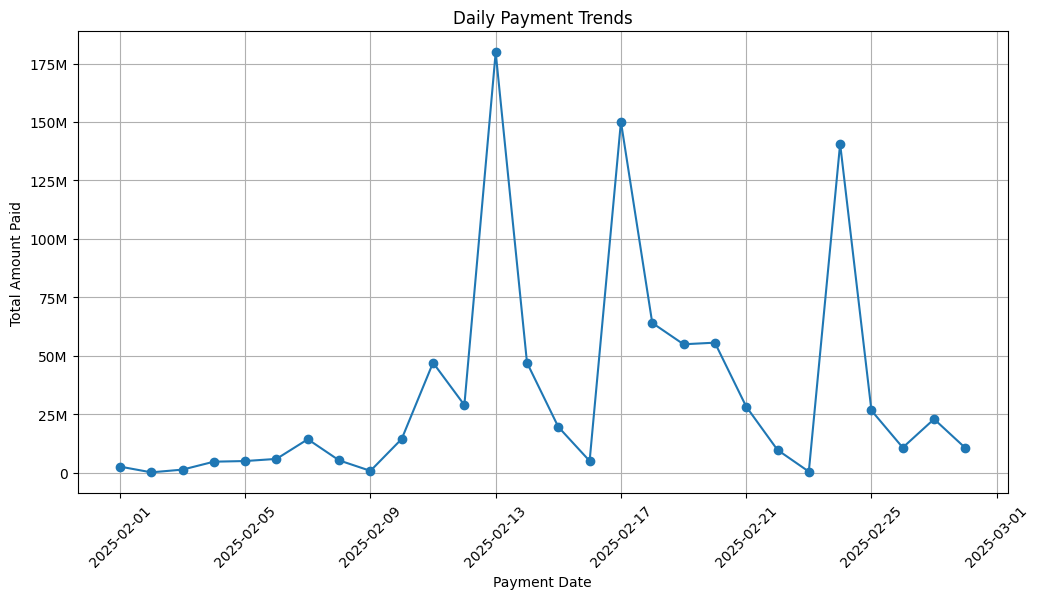

In [7]:

# Convert 'payment_date' to datetime
df['payment_date'] = pd.to_datetime(df['payment_date'], errors='coerce')

# Convert 'account_no' to string to prevent scientific notation issues
df['account_no'] = df['account_no'].astype(str)

# Handling missing values (filling NaN with 'Unknown' for categorical and 0 for numerical)
df.fillna({'feeder': 'Unknown', 'customer': 'Unknown', 'tariff': 'Unknown', 'cust_category': 'Unknown'}, inplace=True)
df['amount'].fillna(0, inplace=True)

# Define the custom formatter function
def billions_formatter(x, pos):
    if x >= 1e9:
        return f'{x*1e-9:.1f}B'
    elif x >= 1e6:
        return f'{x*1e-6:.0f}M'
    else:
        return f'{x:.0f}'

# Aggregate payments by date
payment_trends = df.groupby('payment_date')['amount'].sum()
print(payment_trends)
# Plot payment trends over time
plt.figure(figsize=(12, 6))
plt.plot(payment_trends.index, payment_trends.values, marker='o', linestyle='-')
plt.xlabel('Payment Date')
plt.ylabel('Total Amount Paid')
plt.title('Daily Payment Trends')
plt.xticks(rotation=45)

# Apply formatter to y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions_formatter))

plt.grid()
plt.show()


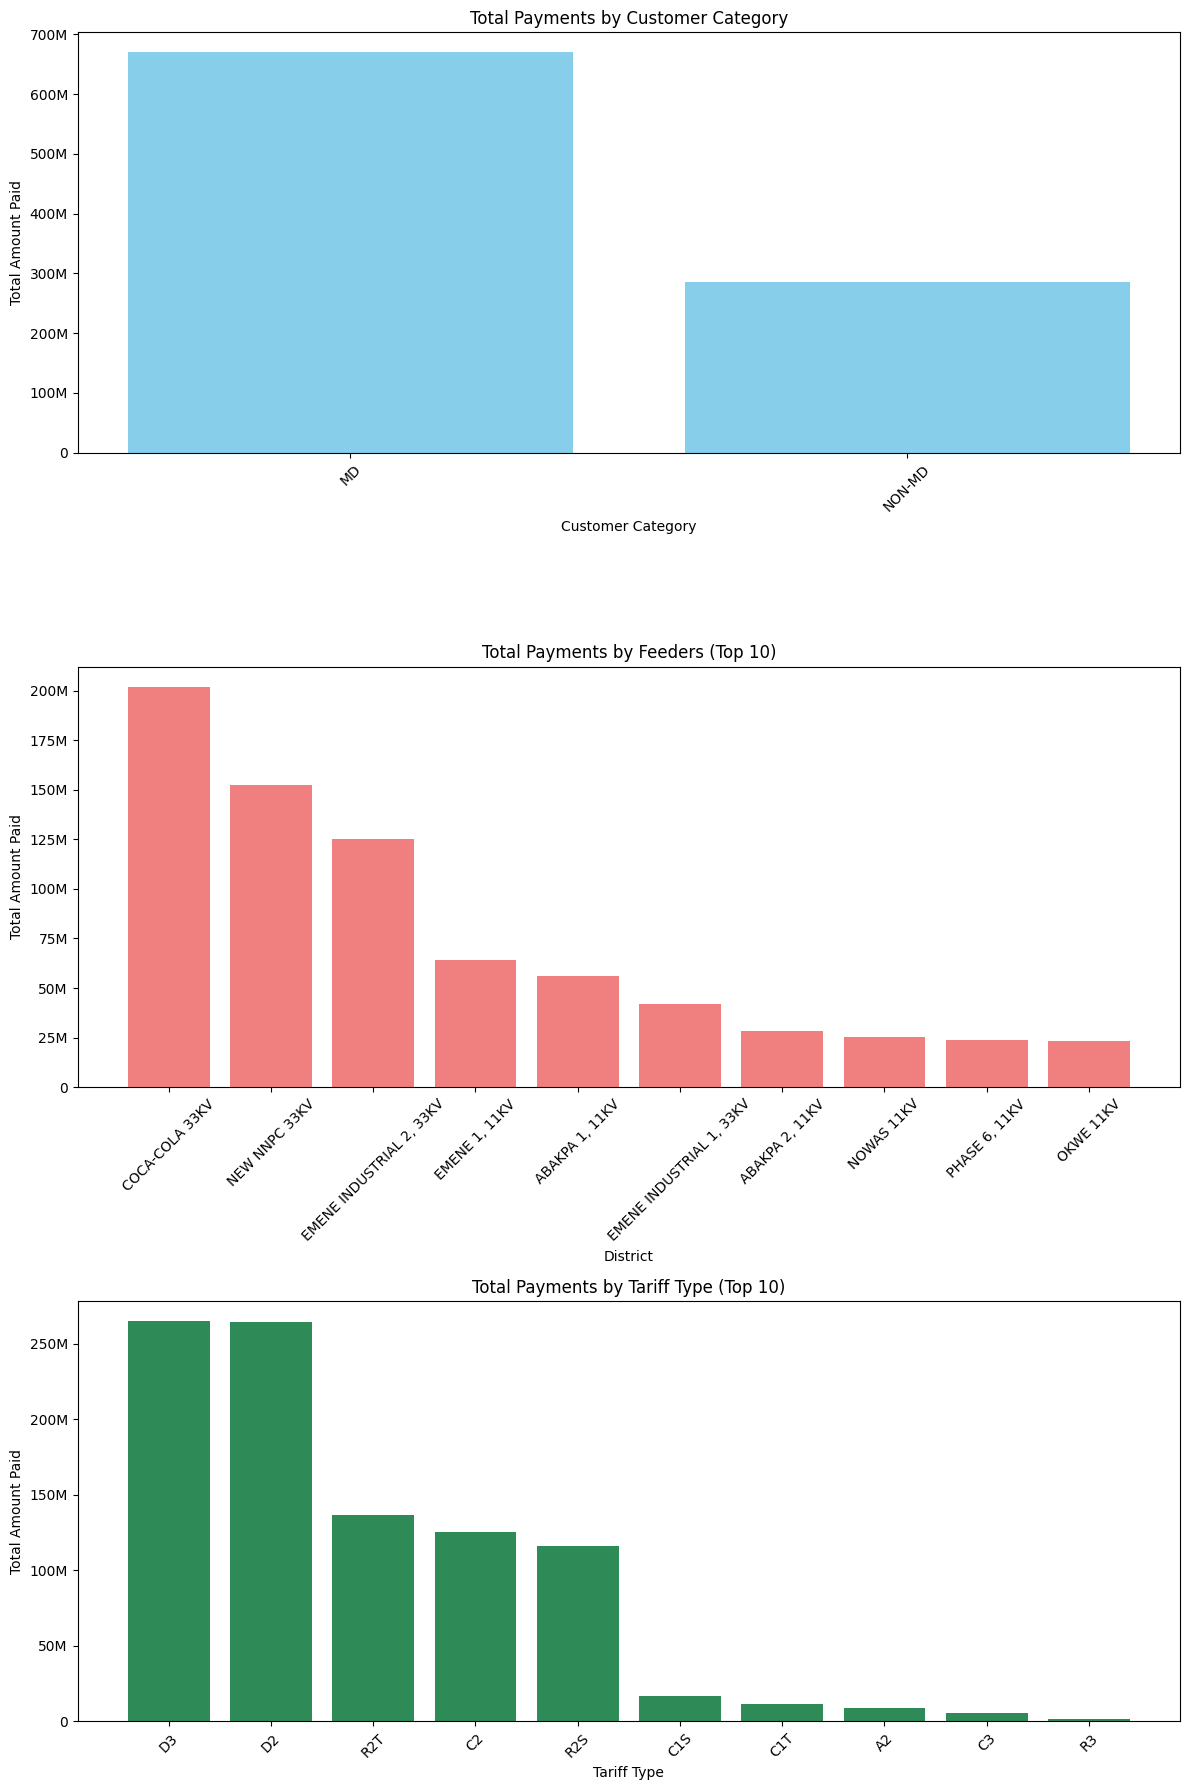

In [9]:
# Aggregate payments by customer category
category_trends = df.groupby('cust_category')['amount'].sum().sort_values(ascending=False)

# Aggregate payments by district
feeder_trends = df.groupby('feeder')['amount'].sum().sort_values(ascending=False)

# Aggregate payments by tariff type
tariff_trends = df.groupby('tariff')['amount'].sum().sort_values(ascending=False)

# Plot settings
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Payment Trends by Customer Category
axes[0].bar(category_trends.index, category_trends.values, color='skyblue')
axes[0].set_title('Total Payments by Customer Category')
axes[0].set_xlabel('Customer Category')
axes[0].set_ylabel('Total Amount Paid')
axes[0].tick_params(axis='x', rotation=45)

# Apply the formatter to the y-axis of axes[0]
axes[0].yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Payment Trends by District
axes[1].bar(feeder_trends.index[:10], feeder_trends.values[:10], color='lightcoral')  # Top 10 districts
axes[1].set_title('Total Payments by Feeders (Top 10)')
axes[1].set_xlabel('District')
axes[1].set_ylabel('Total Amount Paid')
axes[1].tick_params(axis='x', rotation=45)

# Apply the formatter to the y-axis of axes[1]
axes[1].yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Payment Trends by Tariff Type
axes[2].bar(tariff_trends.index[:10], tariff_trends.values[:10], color='seagreen')  # Top 10 tariff types
axes[2].set_title('Total Payments by Tariff Type (Top 10)')
axes[2].set_xlabel('Tariff Type')
axes[2].set_ylabel('Total Amount Paid')
axes[2].tick_params(axis='x', rotation=45)

# Apply the formatter to the y-axis of axes[2]
axes[2].yaxis.set_major_formatter(FuncFormatter(billions_formatter))

plt.tight_layout()
plt.show()